<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入" data-toc-modified-id="导入-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入</a></span></li><li><span><a href="#线性回归" data-toc-modified-id="线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>线性回归</a></span><ul class="toc-item"><li><span><a href="#符号约定" data-toc-modified-id="符号约定-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>符号约定</a></span></li><li><span><a href="#SVD" data-toc-modified-id="SVD-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SVD</a></span></li><li><span><a href="#线性回归采用SVD方法" data-toc-modified-id="线性回归采用SVD方法-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>线性回归采用SVD方法</a></span></li></ul></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Loss" data-toc-modified-id="Loss-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Kernel方法" data-toc-modified-id="Kernel方法-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kernel方法</a></span></li><li><span><a href="#统一求解" data-toc-modified-id="统一求解-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>统一求解</a></span></li><li><span><a href="#求解" data-toc-modified-id="求解-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>求解</a></span><ul class="toc-item"><li><span><a href="#消除$b$" data-toc-modified-id="消除$b$-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>消除$b$</a></span></li><li><span><a href="#求解$w$" data-toc-modified-id="求解$w$-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>求解$w$</a></span><ul class="toc-item"><li><span><a href="#无参数惩罚的方法" data-toc-modified-id="无参数惩罚的方法-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>无参数惩罚的方法</a></span></li><li><span><a href="#对于不使用kernel的ridge方法：" data-toc-modified-id="对于不使用kernel的ridge方法：-3.4.2.2"><span class="toc-item-num">3.4.2.2&nbsp;&nbsp;</span>对于不使用kernel的ridge方法：</a></span></li><li><span><a href="#对于使用kernel的ridge方法：" data-toc-modified-id="对于使用kernel的ridge方法：-3.4.2.3"><span class="toc-item-num">3.4.2.3&nbsp;&nbsp;</span>对于使用kernel的ridge方法：</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lasso</a></span><ul class="toc-item"><li><span><a href="#套索回归采用坐标下降（coordinate-descent）方法" data-toc-modified-id="套索回归采用坐标下降（coordinate-descent）方法-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>套索回归采用坐标下降（coordinate descent）方法</a></span></li></ul></li><li><span><a href="#Check-with-sklearn" data-toc-modified-id="Check-with-sklearn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check with sklearn</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></div>

# 导入

In [1]:
import os
os.sys.path.append("..")

from klslearn.models import LinearRegressor
from klslearn.models import Ridge
from klslearn.models import Lasso
from klslearn.datasets import generate_scatter_labeled as generate
from klslearn.datasets import plot_scatter_2D_labeled as plot2d

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate(M=1, N=100, n= 1):
    np.random.seed(0)
    X = np.random.rand(N, M)
    w = np.arange(1,M+1)
    print(n)
    y = np.sum((w.reshape(1,M)*X) ** n, axis=1) + 0.1*np.random.randn(N)
    return X, y, np.append(w,0)

def test_learner(lr, N=100, n = 1):
    
    X,y,w = generate(1, N, n = n)
    lr.fit(X, y)
    X_plt = np.linspace(0, 1, 50)
    yhat_plt= lr.predict(X_plt[:,np.newaxis])
    
    fig=plt.figure(figsize=(4,4))
    plt.scatter(X, y, color="blue")
    plt.plot(X_plt, yhat_plt, label="fit", color="red")
    plt.plot(X_plt, (X_plt[:]**n) *w[0]+w[1], label="model", color="blue")
    plt.xlabel("$x$", fontsize="large")
    plt.ylabel("$y$", fontsize="large")
    plt.legend(frameon=False, fontsize="large")
    plt.show()
    
def test_shrinkage(cls, max_alpha = 1, n = 1):
    X,y,w=generate(1,100, n=n)
    alphas=[]
    cs=[]
    bs=[]
    alphas = max_alpha*np.power(10, np.linspace(-3, 0))
    for alpha in alphas:
        lr=cls(alpha)
        lr.fit(X, y)
        cs.append(lr.coef_)
        bs.append(lr.intercept_)

    cs=np.array(cs)

    plt.figure(figsize=(4,4))
    plt.plot(alphas, cs[:,0], label="$c_1$")
    plt.plot(alphas, bs, label="b")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(r"$\alpha$", fontsize="large")
    plt.legend(frameon=False, fontsize="large")
    plt.show()


# 线性回归

## 符号约定

全部样本的特征使用$X$表示，


* $X_{ij}$表示样本$i$的特征$j$的数值。 $\mathbf{X}$为$m\times d$大小的矩阵，其中$m$为样本的数量，$d$为特征的数量。
* $\mathbf{y}$为列向量：$(...,y_i,...)^T$。
* $\mathbf{x}_i$为列向量：$(...,X_{ij},...)^T$。
* $\mathbf{w}$为列向量：$(...,w_j,...)^T$。


## SVD
对于一个矩阵$A\in R^{m\times n}$，我们将他分解为
$A = U \Sigma V^T$
其中$U\in R^{m\times m}$，$V\in R^{n\times n}$，$\Sigma\in R^{m\times n}$，且$U$和$V$为正交矩阵，$\Sigma$为"对角"矩阵。
其中
$$
\Sigma={\rm diag}_{m\times n}(\sigma_1,\sigma_2,...,\sigma_r,0,...),\quad r \le \min (m,n)
$$

$$
A_{ij} = \sum_{k\le r} U_{ik}\Sigma_k V_{ik}
$$


# Ridge Regression

## Loss
Ridge的loss函数可以写作：
$$
L = \sum_i (y_i - (\mathbf{x}_i \cdot \mathbf{w} +b) )^2 + \lambda \mathbf{w} \cdot \mathbf{w}
$$
其中$\lambda$ 也会写作 $\alpha$。
显式下表写法：
$$
L = \sum_i^N \left(y_i - \left(\sum_j X_{ij} w_j + b\right) \right)^2 +  \lambda \sum_i^M w_j^2
$$
矩阵写法：
$$
L =  (\mathbf{y} - \mathbf{X}\mathbf{w})^T (\mathbf{y} - \mathbf{X}\mathbf{w})
+ \lambda \mathbf{w}^T  \mathbf{w}
$$

## Kernel方法

如果使用Kernel,设
$$
\mathbf{\phi}_i = \phi(\mathbf{x}_i)
$$
则现在拟合函数为
$$
\hat{y} = \mathbf{w} \cdot \mathbf{\phi}(x) + b
$$

可以证明最优化的$\mathbf{w}$可以表示为$\phi_i$的线性组合，设$\mathbf{\phi}_i$的权重为$\alpha_i$，则

$$
\mathbf{w} = \sum_i^N \alpha_i \mathbf{\phi}_i
$$

则原来的Loss可以写为
$$
L = \sum_i (y_i - \phi_i \cdot \sum_i^N \alpha_j \mathbf{\phi}_j)^2 + \sum_i^N \alpha_i \mathbf{\phi}_i   \cdot \sum_j^N \alpha_j \mathbf{\phi}_j
$$


定义核函数$K$ 
$$
K(\mathbf{x}_i, \mathbf{x}_j) = K_{ij} = \phi_i \cdot \phi_j
$$

则
$$
L = \sum_i (y_i - (\sum_i^N K_{ij} \alpha_j + b))^2 + \sum_i^N \sum_j^N K_{ij} \alpha_i\alpha_j
$$

Loss完全可以写为$\alpha$和$b$的函数。对于预测而言，结果也只依赖与$\alpha$, $b$
$$
\hat{y}(\mathbf{x}) = \sum_j K(\mathbf{x}_j, \mathbf{x}) \alpha_j + b
$$

## 统一求解

对于使用kernel和不使用kernel两种情况，而言loss函数可以统一写为

$$
L =  (\mathbf{y} - (\mathbf{X}\mathbf{w} + b))^T (\mathbf{y} - (\mathbf{X}\mathbf{w} + b))
+ \lambda \mathbf{w}^T \Lambda \mathbf{w}
$$

其中，对于不适用kernel的情况
$$
X = original X_{(N\times M)}
$$
$$
\Lambda = I_{(M\times M)}
$$
对于使用kernel的情况

$$
X_{ij} = K(\mathbf{x}_i, \mathbf{x}_j)_{(N\times N)}
$$
$$
\Lambda_{ij} = K(\mathbf{x}_i, \mathbf{x}_j)_{(N\times N)}
$$


## 求解
### 消除$b$

我们首先求解$b$, loss函数对$b$求导，并且令倒数为0，便可以得到
对$b$求导数为
$$
0 = -2\sum_i (y_i - (X \mathbf{w})_i + b)
$$
全部数据点的平均值为$\bar{X}$和$\bar{y}$，则
$$
b = \bar{y} - \bar{X}\mathbf{w}
$$
带入loss函数则
$$
L =  (\mathbf{y} -\bar{\mathbf{y}} - (X - \bar{X})\mathbf{w} )^T (\mathbf{y} - \bar{\mathbf{y}} - (X-\bar{X})\mathbf{w})
+ \lambda \mathbf{w}^T \Lambda \mathbf{w}
$$
设
$$
X^\prime = X - \bar{X}
$$
$$
y' = y - \bar{y}
$$

Loss函数使用$X'$和$y'$表示为
$$
L =  (\mathbf{y}' - X'\mathbf{w} )^T (\mathbf{y}' - X' \mathbf{w})
+ \lambda \mathbf{w}^T \Lambda \mathbf{w}
$$

```python
Xmeans = X.mean(axis = 0)
ymeans = y.mean(axis = 0)
Xp = X - Xmeans
yp = y - ymeans
```

### 求解$w$

loss函数对$w$求导，并且令倒数为0，便可以得到
$$
0 = \partial_{w_j} L = \sum_i 2 (y_i - X'_{ij} w_j) (-X'_{ij}) + 2\lambda\Lambda w
$$
经过化简后得到
$$
(X'^T X' + \lambda\Lambda) \mathbf{w} =  X'^T y
$$

设$X$的SVD分解为$X' = U\Sigma V^T$，则上公式可以化简为
$$
(\lambda \Lambda+ V \Sigma^T \Sigma V^T)\mathbf{w} = V \Sigma^T U^T \mathbf{y}
$$

$\Sigma^T \Sigma$为$M \times M$的方型矩阵，$\Sigma^T \Sigma = {\rm diag}(\sigma_1^2, ..., \sigma_r^2, 0, ...)$，
$U$和$V$为正交矩阵。

#### 无参数惩罚的方法

$$
(V \Sigma^T \Sigma V^T)\mathbf{w} = V \Sigma^T U^T \mathbf{y}
$$

$V$为正交矩阵一定可逆且逆为$V^T$，于是
$$
\Sigma^T \Sigma V^T\mathbf{w} = \Sigma^T U^T \mathbf{y}
$$
$\Sigma$不一定可逆，因为$\Sigma$可能有元素全部为0的行。如果$\Sigma$不包含元素全部为0的行，则
$$
\mathbf{w} = V (\Sigma^T \Sigma)^{-1} \Sigma^T U^T \mathbf{y}
$$


如果$\Sigma$包含全部为0的行，对于$\Sigma$全部为0的行，$V^T \mathbf{w}$取多少，方程两边都为0，方程自然平衡，于是方程有无穷多个解。
这是因为此时$X'$的秩($r$)小于$M$，方程$\mathbf{y}' = X\mathbf{w}' + b$有无穷解。此时我们为了得到确定的$\mathbf{w}$。我们求使得$L$最小的$\mathbf{w}$中，使得$|\bf{w}|^2$最小的。
由于
$$
|\mathbf{w}|^2 =  |V^T \mathbf{w}|^2 
$$
对于$\Sigma$全为0的行，应当是相应行的$V^T \mathbf{w}$设为0。


设$\Sigma_r = {\rm diag}(\sigma_1, ..., \sigma_{r-k},0,...,0)$，其中$r=\text{min}(M,N)$，其中$k$个对角元为0。$U^T_{r\times N}$表示$U$的前$r$行。$V_{M \times r}$表示$U$的前$r$列。
于是
$$
\Sigma_r^T \Sigma_r (V_{M\times r})^T\mathbf{w} = \Sigma^T_r U^T_{r\times M} \mathbf{y}
$$
最后有
$$
 \mathbf{w} = V_{n \times r} \Sigma_r^{-1} U^T_{r\times m} \mathbf{y}
$$


$\Sigma_r^{-1} = {\rm diag}(1/\sigma_1, ..., 1/\sigma_{r-k},0,...,0)$。
或者可以表示为
$$
 \mathbf{w} = \lim_{\lambda\rightarrow 0} V_{n \times r} (\Sigma_r^T \Sigma_r + \lambda I)^{-1} \Sigma_r^T U^T_{r\times m} \mathbf{y}
$$



#### 对于不使用kernel的ridge方法：

由于 $(\lambda I + \Sigma^T \Sigma)$可逆
$$
\mathbf{w} = V (\lambda I + \Sigma^T \Sigma)^{-1}\Sigma^T U^T \mathbf{y}
$$

实际上我们并不需要完整的$U$和$V$便能得到等价的结果
$$
\mathbf{w} = V_{M\times r}(\lambda I + \Sigma^T \Sigma)^{-1}_{r\times r}\Sigma^T_{r\times r} U^T_{r\times N} \mathbf{y}
$$
或者更显式的表示为
$$
\mathbf{w} = V_{M\times r} \left(\left(\frac{\sigma_i} {\sigma_i^2 + \lambda}\right)_{(r)} * \left( U^T_{r\times N} \mathbf{y} \right)\right)
$$

$*$表示左右向量对应元素相乘。

上式明显的显示出$X^T$的奇异值是如何和$X^T X$的奇异值**对齐**，然后奇异值$\sigma_i$较小的分量如何被压制的。尽管svd技巧使得程序更慢，但是数值更稳定。

```python
U,D,VT = np.linalg.svd(Xp, full_matrices=False)
# U[N,r]
# D[r,r]
# VT[r,M]
invD = D/(np.square(D) + lamb) 
w = VT.T.dot((invD*U.T.dot(yp)))
b =  ymeans - w.dot(Xmeans)
```

#### 对于使用kernel的ridge方法：
对于使用kernel的情况，将$\Lambda = X$带入再化简，便有
$$
(X + \lambda) \mathbf{w} = y
$$
$w$从上式直接求解得到。
使用kernel后是无法使用svd技巧的，$\lambda$项可以减少过拟合更是令数值更稳定。但是如果$\lambda$过小的话，就会面临数值的问题。`numpy.linalg.lstsq`内部使用SVD来进行矩阵求逆，但是此时已经晚了，使用`lstsq`并不能缓解数值不稳定的情况。

1


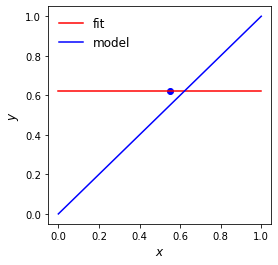

1


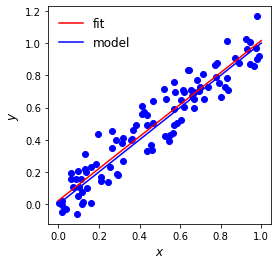

In [3]:
test_learner(LinearRegressor(), N=1)
test_learner(LinearRegressor(), N=100)

1


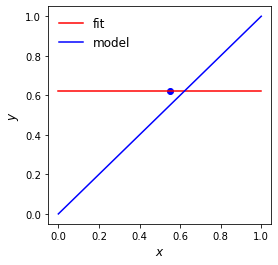

1


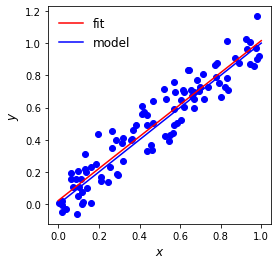

1


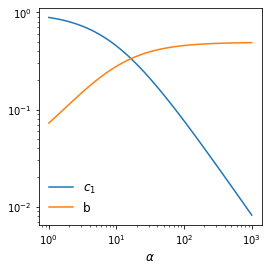

In [4]:
test_learner(Ridge(alpha=0.01), N=1)
test_learner(Ridge())
test_shrinkage(Ridge, max_alpha=1000)

2


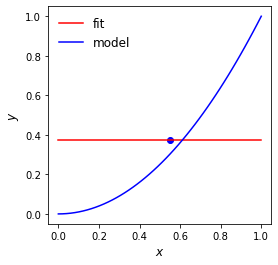

2


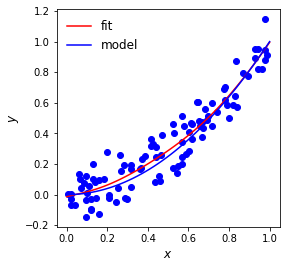

1


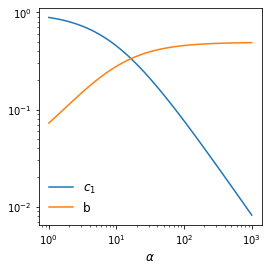

In [5]:
test_learner(Ridge(alpha=0.01), N=1, n=2)
test_learner(Ridge(alpha=1E-7, kernel="rbf"), n=2)
test_shrinkage(Ridge, max_alpha=1000)

# Lasso

## 套索回归采用坐标下降（coordinate descent）方法
$$
L = \sum_i (y_i - \sum_j X_{ij} w_j)^2 + \lambda \sum_j |w_j|
$$
其中$\lambda = 2\alpha m$。
loss函数中与$w_k$有关的项为
$$
L = \sum_i (y_i - \sum_j X_{ij} w_j)^2
=\sum_i (y_i - \sum_j X_{ij\neq k} w_j - X_{ik}w_k)^2 + \lambda \sum_j |w_j|
$$

$$L \sim \sum_i (X_{ik}w_k)^2 + 2 \sum_i \left(\sum_j X_{ij\neq k }w_{j}- y_i\right) X_{ik} w_{k}  + \lambda |w_k|$$

$$L \sim \left(\sum_i X^2_{ik}\right) w_k^2 + 2 \sum_i \left(\sum_j X_{ij}w_{j} - X_{ik} w_{k}  - y_i\right) X_{ik} w_{k} + \lambda |w_k|$$

定义
$$
A_j = \sum_i X^2_{ij}
$$

$$
B_{jk} = \sum_i X_{ij} X_{ik}
$$

$$
C_k = \sum_i y_i X_{ik}
$$

则
$$L \sim A_k w_k^2 + 2 \left(\sum_j B_{jk} w_j - A_k w_k  - C_k \right) w_k + \lambda |w_k|$$
注意大圆括号的项实际并不包含$w_k$。

设第$s$步，$w_j$数值为$w_j^{(s)}$，则

$$ L \sim A_k w_k^2 + 2 \left(\sum_j B_{j k} w_j^{(s)} - A_k w_k^{(s)}  - C_k \right) w_k + \lambda |w_k|$$

$$ L \sim A_k w_k^2 + 2 F_k w_k + \lambda |w_k|$$

优化$w_k$应该分情况讨论，设$w_k > 0$，则最优化位置为
$$
w_k = -(F_k + \lambda/2)/A_k
$$
自恰条件为
$$
F_k > -\lambda/2
$$

设$w_k < 0$，则最优化位置为
$$
w_k = -(F_k - \lambda/2)/A_k
$$
自恰条件为
$$
F_k > \lambda/2
$$
两者都不满足，那么$w_k = 0$



1


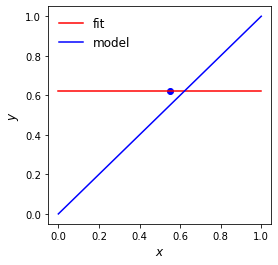

1


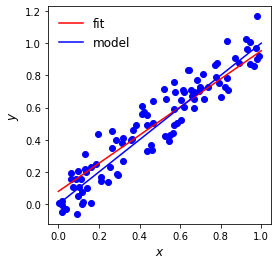

1


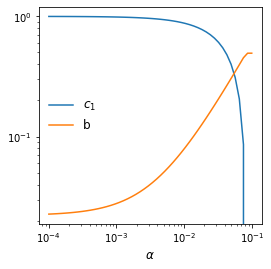

In [6]:
test_learner(Lasso(), N=1)
test_learner(Lasso())
test_shrinkage(Lasso, max_alpha=0.1)

# Check with sklearn

In [7]:
import sklearn as sk
import sklearn.linear_model

X, y, w = get_data(3, 10)
linear=LinearRegressor()
linear.fit(X,y)

ridge=Ridge(alpha=1)
ridge.fit(X,y)

lasso=Lasso(alpha=1E-2)
lasso.fit(X,y)

sklr=sk.linear_model.LinearRegression()
sklr.fit(X, y)

skridge=sk.linear_model.Ridge(alpha=1)
skridge.fit(X, y)

sklasso=sk.linear_model.Lasso(alpha=1E-2)
sklasso.fit(X, y)


print("%30s %10s"%("model","package"), end=" ")
print("%35s %20s"%("[coef ...]","bias"))

print("%30s %10s"%("LinearRegressor","ksllearn"), end=" ")
print("%35s %20s"%(linear.coef_, linear.intercept_))

print("%30s %10s"%("Ridge","ksllearn"), end=" ")
print("%35s %20s"%(ridge.coef_, ridge.intercept_))

print("%30s %10s"%("Lasso","ksllearn"), end=" ")
print("%35s %20s"%(lasso.coef_, lasso.intercept_))

print("%30s %10s"%("LinearRegression", "sklearn"), end=" ")
print("%35s %20s"%(sklr.coef_, sklr.intercept_))

print("%30s %10s"%("Ridge","sklearn"), end=" ")
print("%35s %20s"%(skridge.coef_, skridge.intercept_))

print("%30s %10s"%("Lasso","sklearn"), end=" ")
print("%35s %20s"%(sklasso.coef_, sklasso.intercept_))

NameError: name 'get_data' is not defined

# Benchmark

In [ ]:
import numpy as np
        
class LinearRegression1:
    
    def __init__(self):
        pass
    
    def fit(self,X,y):
        fitSVD1(X,y)
    
    def fitInv1(self, X, y):
        '''
        W=(X^T X)^-1 X^T y
        calculate from left to right
        '''
        X=np.c_[X,np.ones(shape=(X.shape[0],1),dtype=X.dtype)]
        W=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.coef_=W

    def fitInv2(self, X, y):        
        '''
        W=(X^T X)^-1 X^T y
        calculate from right to left
        '''
        X=np.c_[X,np.ones(shape=(X.shape[0],1),dtype=X.dtype)]
        W=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
        self.coef_=W

    def fitInv3(self, X, y):        
        '''
        W=(X^T X)^-1 X^T y
        calculate from right to left
        '''
        X=np.c_[X,np.ones(shape=(X.shape[0],1),dtype=X.dtype)]
        W=np.linalg.solve(X.T.dot(X), X.T.dot(y))
        self.coef_=W
        
    def fitSVD1(self, X, y):
        X=np.c_[X,np.ones(shape=(X.shape[0],1),dtype=X.dtype)]
        U,D,VT=np.linalg.svd(X, full_matrices=False)
        W=VT.T.dot((1/D*U.T.dot(y)))
        self.coef_=W

def benchmark():
    N=1000
    M=10
    np.random.seed(0)
    X=np.random.rand(N,M)
    w=np.arange(M)
    w=np.power(w,1)
    y=np.sum(w.reshape(1,M)*X, axis=1) + np.random.randn(N)

    lr = LinearRegression1()
    print("LinearRegression by inverse X^T.X")
    %timeit lr.fitInv1(X,y)
    %timeit lr.fitInv2(X,y)
    %timeit lr.fitInv3(X,y)
    print("LinearRegression by SVD")
    %timeit lr.fitSVD1(X,y)
    %timeit lr.fitSVD1(X,y)
    %timeit lr.fitSVD1(X,y)
    
    
    linear = LinearRegressor()
    print("LinearRegressor by SVD")
    %timeit linear.fit(X,y)
    
benchmark()